## Feature definition and creation of NPZ files containing the feature matrix, and the target vector for each set.

In [4]:
import numpy as np
import pandas as pd
import import_ipynb
from custom_features import get_all_features
from custom_features import get_pswm  

In [5]:
dataset = pd.read_csv("../Data_Preparation/train_bench.tsv", sep = "\t")

# 5-cross-validation run: for each run i, testing set=i, validation set=((i)%5)+1, training sets = remaining i sets

for i in range(1,6): #iteration on the sets 
    training_sets=((((i +1)%5)+1),(((i+2)%5)+1),(((i+3)%5)+1)) 
    testing = dataset.query(f"Set=='{i}'")
    validation = dataset.query(f"Set=='{((i)%5)+1}'")
    training = dataset.query(f"(Set=='{training_sets[0]}' or Set=='{training_sets[1]}' or Set=='{training_sets[2]}')")

    print("-"*100)
    print("testing set: ",i)
    print("validation set: ", ((i)%5)+1)
    print("training sets: ",training_sets)

    
    #TRAINING
    matrix_training = get_pswm(training , 13 , 2)
    feature_set_training , feature_order_training = get_all_features(training["Sequence"] , matrix_training, 15 )
    
    # create the target vector:
    vector_neg_pos = training["Class"]
    vector_proper = vector_neg_pos.map({"Positive": 1, "Negative": 0})
    target_training_vector = vector_proper.to_numpy()
    # Save the three feature matrices and the target vector to a .npz file with different keys
    np.savez(f'training_features_{i}.npz', matrix=feature_set_training, target=target_training_vector)

    #VALIDATION
    matrix_validation = get_pswm(validation , 13 , 2)
    feature_set_validation , feature_order_validation = get_all_features(validation["Sequence"] , matrix_validation, 15 )
 
    
    # create the target vector:
    vector_neg_pos = validation["Class"]
    vector_proper = vector_neg_pos.map({"Positive": 1, "Negative": 0})
    target_validation_vector = vector_proper.to_numpy()
    # Save the three feature matrices and the target vector to a .npz file with different keys
    np.savez(f'validation_features_{i}.npz', matrix=feature_set_validation, target=target_validation_vector)

    #TRAINING
    matrix_testing = get_pswm(testing , 13 , 2)
    feature_set_testing , feature_order_testing = get_all_features(testing["Sequence"] , matrix_testing, 15 )
    
    
    
    # create the target vector:
    vector_neg_pos = testing["Class"]
    vector_proper = vector_neg_pos.map({"Positive": 1, "Negative": 0})
    target_testing_vector = vector_proper.to_numpy()
    # Save the three feature matrices and the target vector to a .npz file with different keys
    np.savez(f'testing_features_{i}.npz', matrix=feature_set_testing, target=target_testing_vector)


    #now we have created a file for each set, for that iteration

----------------------------------------------------------------------------------------------------
testing set:  1
validation set:  2
training sets:  (3, 4, 5)
----------------------------------------------------------------------------------------------------
testing set:  2
validation set:  3
training sets:  (4, 5, 1)
----------------------------------------------------------------------------------------------------
testing set:  3
validation set:  4
training sets:  (5, 1, 2)
----------------------------------------------------------------------------------------------------
testing set:  4
validation set:  5
training sets:  (1, 2, 3)
----------------------------------------------------------------------------------------------------
testing set:  5
validation set:  1
training sets:  (2, 3, 4)


## Feature selection and SVM training

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef

In [26]:
def performance_on_subset(subset_features, feature_order_training, x_train, y_train, x_val, y_val, pipeline):
    #find the col number of a specific feature
    idx = [feature_order_training.index(f) for f in subset_features] 
    #idx = [feature_order_training.index(f) for f in subset_features] 
    #take the column of the corrispective feature
    Xtr = x_train[:, idx] 
    Xva = x_val[:, idx]
    pipeline.fit(Xtr, y_train)     # train the svm on training data
    y_pred = pipeline.predict(Xva) # predict on validation data
    mcc = matthews_corrcoef(y_val, y_pred) # compute MCC 
    return mcc  # mcc on VALIDATION

Features by Gini importance for 1-th iteration:
               feature  importance
0           VhonHeijne    0.327874
1      tm_tendency_max    0.085141
2    max_miyazawa_mean    0.047573
3   chou_fasman_h_mean    0.042160
4      flexibility_max    0.023895
5     flexibility_mean    0.023696
6     tm_tendency_mean    0.022186
7             basicity    0.021494
8                    R    0.020381
9        miyazawa_mean    0.020306
10          punta_mean    0.019600
11      bulkiness_mean    0.018846
12           punta_max    0.018820
13                   L    0.017440
14                   C    0.017040
15    chou_fasma_b_max    0.016047
16                   E    0.015993
17          argos_mean    0.015466
18                   K    0.015434
19   chou_fasman_h_max    0.014504
20   chou_fasma_b_mean    0.013971
21                   I    0.013009
22                   S    0.012974
23                   M    0.011912
24   aromatic_residues    0.011859
25       bulkiness_max    0.011634
26     

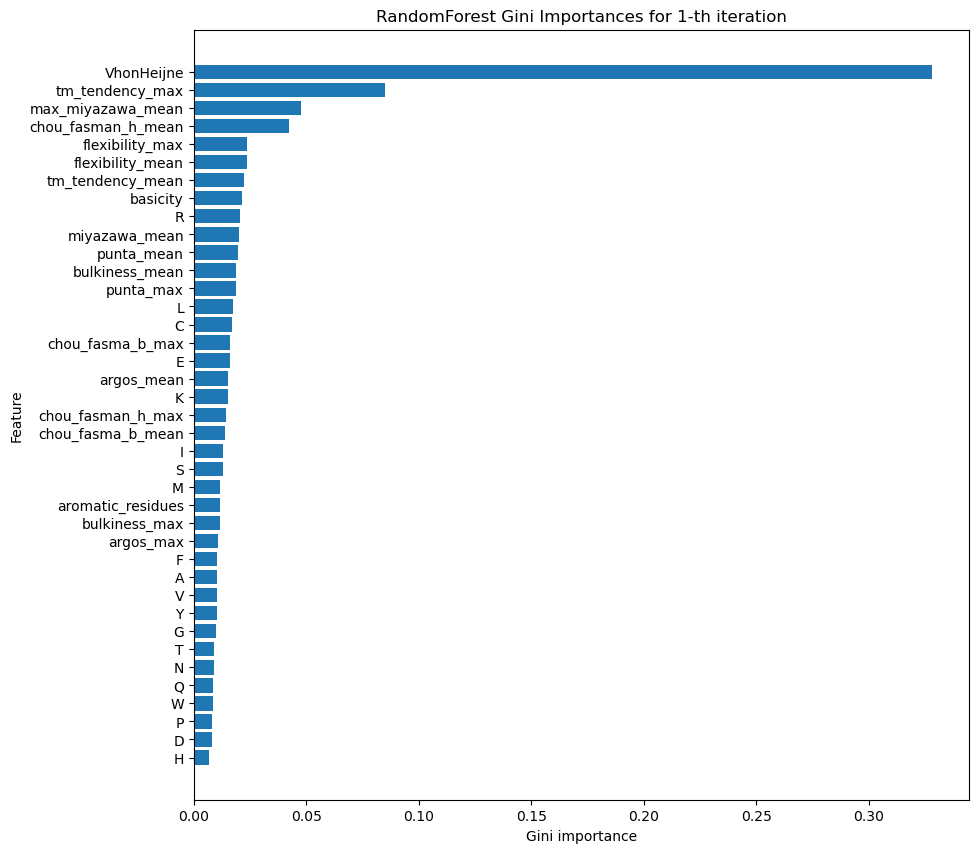

Best k on validation (using baseline best params): k=24, val_acc=0.870


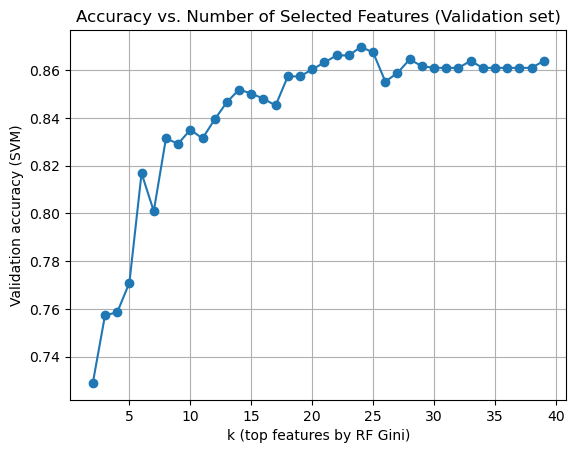

----------------------------------------------------------------------------------------------------
Features by Gini importance for 2-th iteration:
               feature  importance
0           VhonHeijne    0.315868
1      tm_tendency_max    0.095728
2    max_miyazawa_mean    0.049291
3   chou_fasman_h_mean    0.037577
4                    R    0.023986
5     flexibility_mean    0.021818
6             basicity    0.021238
7      flexibility_max    0.020016
8        miyazawa_mean    0.019896
9       bulkiness_mean    0.018344
10    tm_tendency_mean    0.018072
11          punta_mean    0.017693
12                   L    0.017192
13                   K    0.017162
14          argos_mean    0.016906
15           punta_max    0.016893
16    chou_fasma_b_max    0.016872
17                   C    0.016486
18                   I    0.016140
19                   M    0.015065
20                   E    0.014981
21                   S    0.014766
22   chou_fasma_b_mean    0.014028
23         

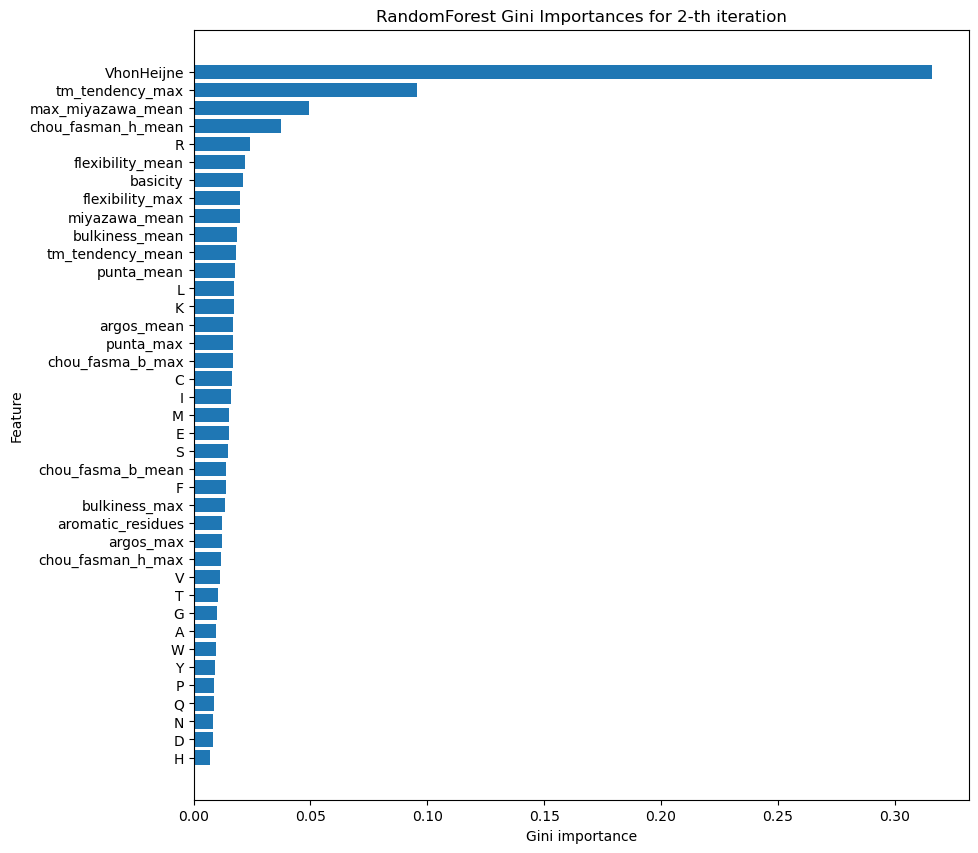

Best k on validation (using baseline best params): k=28, val_acc=0.877


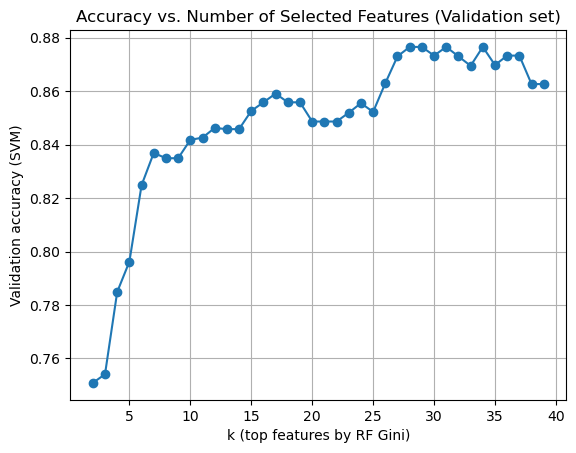

----------------------------------------------------------------------------------------------------
Features by Gini importance for 3-th iteration:
               feature  importance
0           VhonHeijne    0.323339
1      tm_tendency_max    0.094463
2    max_miyazawa_mean    0.048441
3   chou_fasman_h_mean    0.041108
4             basicity    0.025003
5                    R    0.024064
6        miyazawa_mean    0.022886
7     flexibility_mean    0.021857
8      flexibility_max    0.020259
9     tm_tendency_mean    0.019389
10      bulkiness_mean    0.018853
11          argos_mean    0.017668
12          punta_mean    0.017567
13           punta_max    0.017236
14                   C    0.016618
15                   K    0.016507
16    chou_fasma_b_max    0.016191
17                   L    0.015542
18                   I    0.014866
19       bulkiness_max    0.014184
20   chou_fasma_b_mean    0.014113
21           argos_max    0.013431
22   aromatic_residues    0.013132
23         

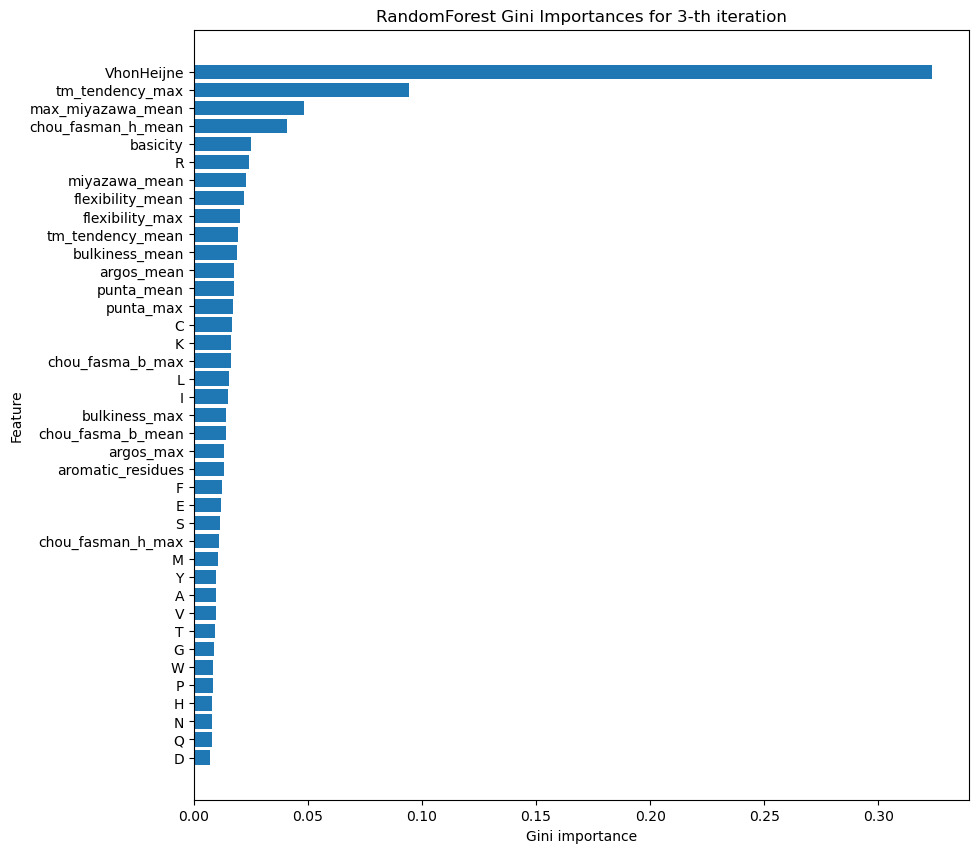

Best k on validation (using baseline best params): k=14, val_acc=0.836


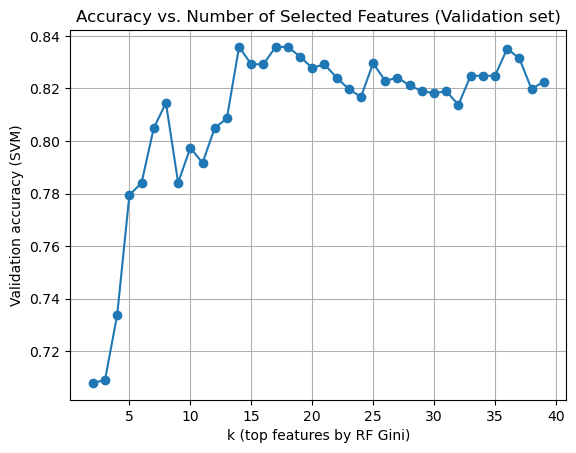

----------------------------------------------------------------------------------------------------
Features by Gini importance for 4-th iteration:
               feature  importance
0           VhonHeijne    0.332678
1      tm_tendency_max    0.088204
2   chou_fasman_h_mean    0.045846
3    max_miyazawa_mean    0.045146
4             basicity    0.026861
5     flexibility_mean    0.025685
6       bulkiness_mean    0.024367
7                    R    0.020887
8      flexibility_max    0.020530
9     tm_tendency_mean    0.020116
10       miyazawa_mean    0.018655
11           punta_max    0.018509
12          punta_mean    0.017553
13                   K    0.016233
14    chou_fasma_b_max    0.015836
15          argos_mean    0.015568
16                   C    0.015181
17                   L    0.014615
18       bulkiness_max    0.014108
19   aromatic_residues    0.013955
20                   I    0.013819
21                   E    0.013692
22   chou_fasma_b_mean    0.013425
23         

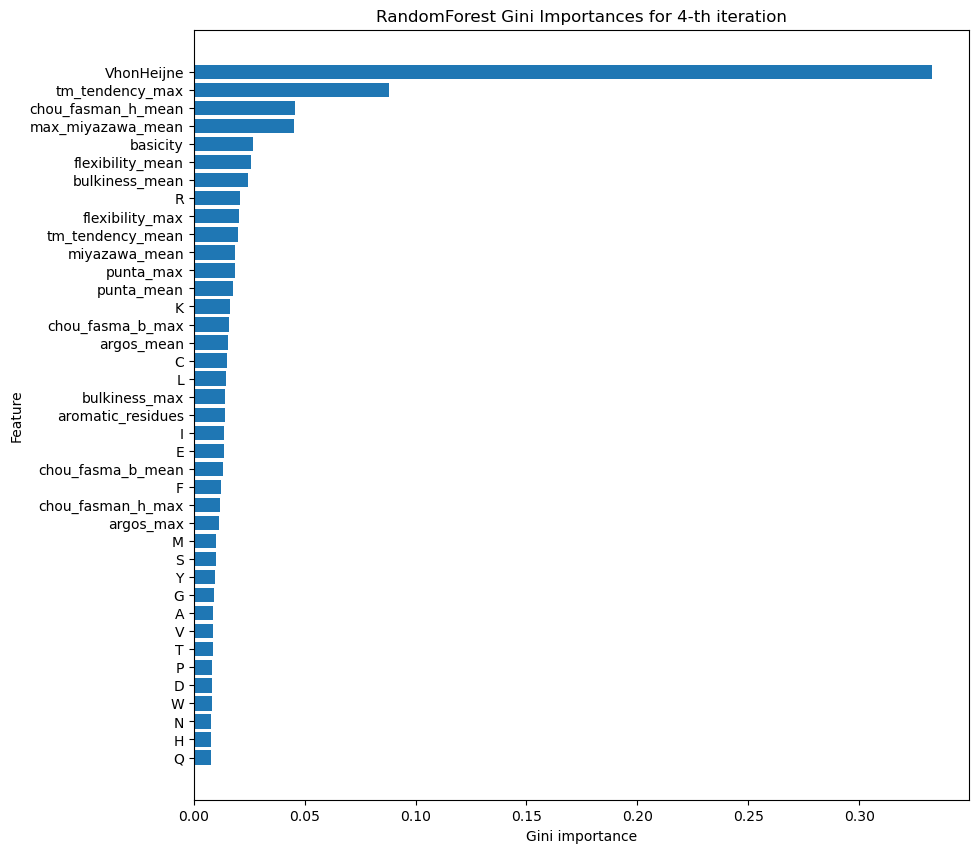

Best k on validation (using baseline best params): k=12, val_acc=0.854


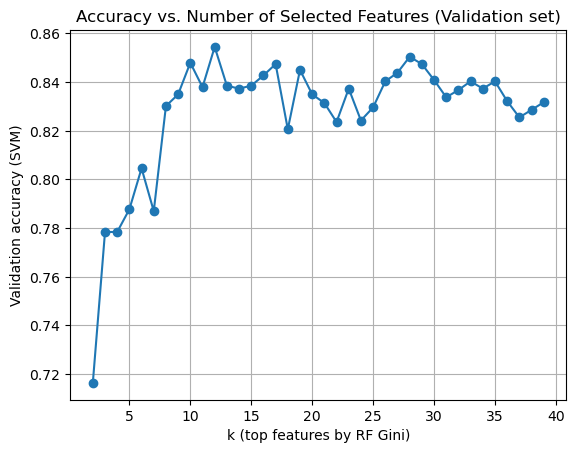

----------------------------------------------------------------------------------------------------
Features by Gini importance for 5-th iteration:
               feature  importance
0           VhonHeijne    0.335989
1      tm_tendency_max    0.080619
2    max_miyazawa_mean    0.045833
3   chou_fasman_h_mean    0.042609
4             basicity    0.027755
5     flexibility_mean    0.025535
6     tm_tendency_mean    0.023852
7      flexibility_max    0.021533
8                    R    0.020326
9            punta_max    0.020179
10      bulkiness_mean    0.019209
11          punta_mean    0.018420
12       miyazawa_mean    0.018168
13                   L    0.016214
14          argos_mean    0.015527
15                   C    0.015409
16    chou_fasma_b_max    0.015100
17                   K    0.014828
18   chou_fasma_b_mean    0.013578
19   aromatic_residues    0.013327
20                   E    0.013187
21   chou_fasman_h_max    0.013112
22                   I    0.013036
23       bu

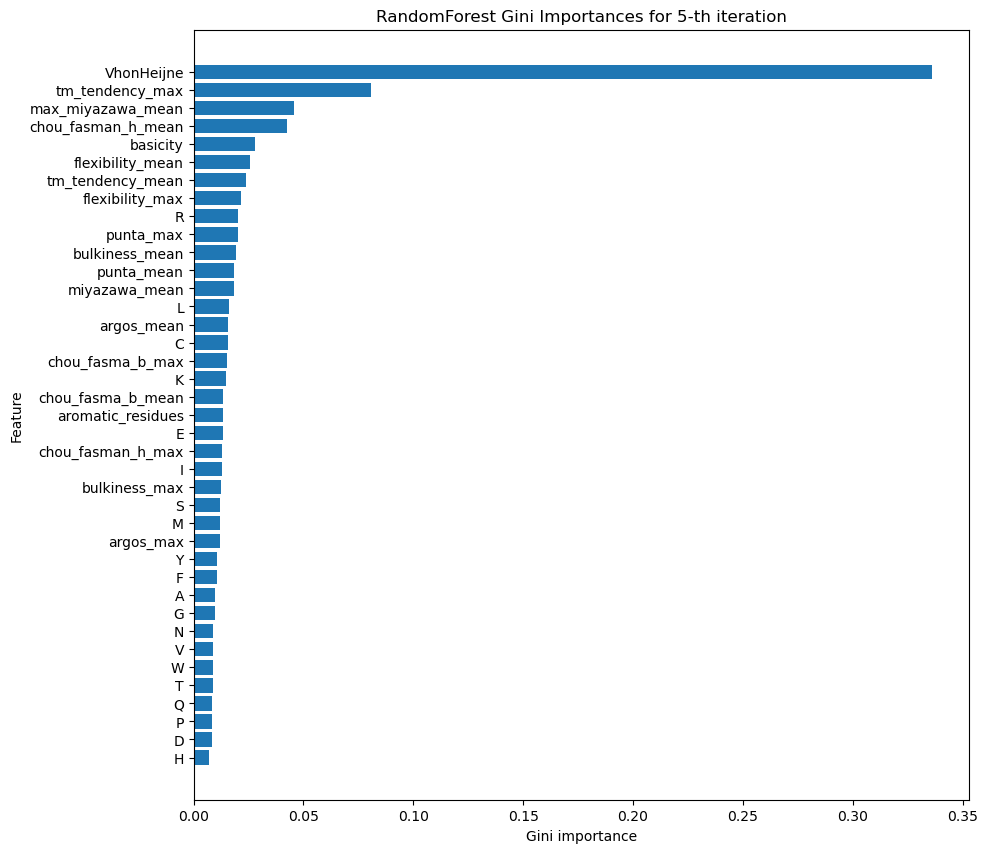

Best k on validation (using baseline best params): k=35, val_acc=0.845


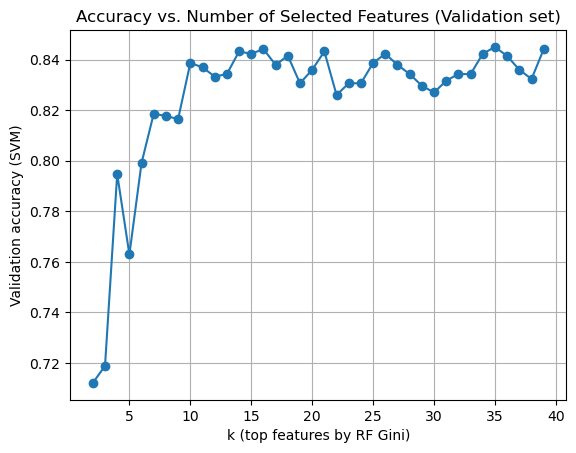

----------------------------------------------------------------------------------------------------


In [29]:
# create a simple grid for SVM parameters
C_grid = [0.1, 1.0, 10.0, 100.0]
gamma_grid = ["scale", 0.01, 0.1, 1.0]

#create a Pipeline with StandardScaler to normalize data and SVC as predictor model
pipeline = Pipeline([("scaler" , StandardScaler()) , ("svm" , SVC())])
rf = RandomForestClassifier(n_estimators=1000, n_jobs=-1) # construct the random forest classifier (-1 vuol dire utilizzare tutti i processori in parallelo). 


for i in range(1,6): #iteration on the sets 
    #Load the npz files of training, testing and validation sets for each iteration
    # load training
    loaded_data_train = np.load(f'training_features_{i}.npz')
    x_train = loaded_data_train['matrix']
    y_train = loaded_data_train['target']
    
    # load test
    loaded_data_test = np.load(f'testing_features_{i}.npz')
    x_test = loaded_data_test['matrix']
    y_test = loaded_data_test['target']
    
    # load validation
    loaded_data_validation = np.load(f'validation_features_{i}.npz')
    x_validation = loaded_data_validation['matrix']
    y_validation = loaded_data_validation['target']
    
    # grid search to set initial C and gamma parameters
    best_mcc=-1  #initialize mcc as -1
    # iterate over C and gamma we defined earlier
    for C in C_grid: 
        for gamma in gamma_grid:
            #use the pipeline we created earlier with rbf kernel
            pipeline.set_params(svm__kernel="rbf",svm__C=C , svm__gamma=gamma)
            pipeline.fit(x_train, y_train)  # fit on training data
            y_pred = pipeline.predict(x_test) # predict on test data
            mcc = matthews_corrcoef(y_test, y_pred) # compute MCC     
            # store parameter values that give best MCC
            if mcc > best_mcc:
                best_mcc = mcc
                best_params_base =  (C, gamma)
    pipeline.set_params(svm__kernel="rbf", svm__C=best_params_base[0], svm__gamma=best_params_base[1])
    rf.fit(x_train, y_train)  # fit on train data
    # create a Series with feature name and the corresponding feature importance based on Gini impurity
    gini_imp = pd.Series(rf.feature_importances_, index=feature_order_testing).sort_values(ascending=False) 
    gini_df = gini_imp.reset_index()
    # name the columns
    gini_df.columns = ["feature", "importance"]
    print(f"Features by Gini importance for {i}-th iteration:")
    print(gini_df)
    
    # Plot the results
    plt.figure(figsize=(10, 10))
    plt.barh(gini_df["feature"][::-1], gini_df["importance"][::-1])
    plt.xlabel("Gini importance")
    plt.ylabel("Feature")
    plt.title(f"RandomForest Gini Importances for {i}-th iteration")
    plt.show()

    
    # We'll sweep k and, for each k, re-evaluate the best baseline SVM params on the reduced feature set
    ks = list(range(2, x_train.shape[1]+1))  # keep it small for speed/clarity
    curve = []

    for k in ks:
        subset = gini_df["feature"].head(k).tolist()
        mcc_k = performance_on_subset(subset, feature_order_training, x_train, y_train, x_validation, y_validation, pipeline)
        curve.append(mcc_k)
    best_k_idx = int(np.argmax(curve))
    #argmax ti returna l indice del valore piu alto in quella lista.
    best_k = ks[best_k_idx]
    print(f"Best k on validation (using baseline best params): k={best_k}, val_acc={curve[best_k_idx]:.3f}")
    
    #trova k che massimizza la curva, poi solo plotting 
    plt.figure()
    plt.plot(ks, curve, marker="o")
    plt.xlabel("k (top features by RF Gini)")
    plt.ylabel("Validation accuracy (SVM)")
    plt.title("Accuracy vs. Number of Selected Features (Validation set)")
    plt.grid(True)
    plt.show()
    print("-"*100)

Features by Gini importance for 5-th iteration:
               feature  importance
0           VhonHeijne    0.330401
1      tm_tendency_max    0.090932
2   chou_fasman_h_mean    0.044112
3    max_miyazawa_mean    0.043859
4             basicity    0.027230
5       bulkiness_mean    0.023859
6     flexibility_mean    0.023654
7                    R    0.021942
8      flexibility_max    0.020419
9        miyazawa_mean    0.019894
10    tm_tendency_mean    0.019178
11           punta_max    0.018883
12          argos_mean    0.017001
13          punta_mean    0.016687
14    chou_fasma_b_max    0.016127
15                   K    0.015915
16                   C    0.015628
17   aromatic_residues    0.014410
18   chou_fasma_b_mean    0.014336
19                   L    0.014236
20                   I    0.013654
21       bulkiness_max    0.013599
22                   F    0.013500
23                   E    0.013192
24           argos_max    0.011983
25   chou_fasman_h_max    0.011966
26     

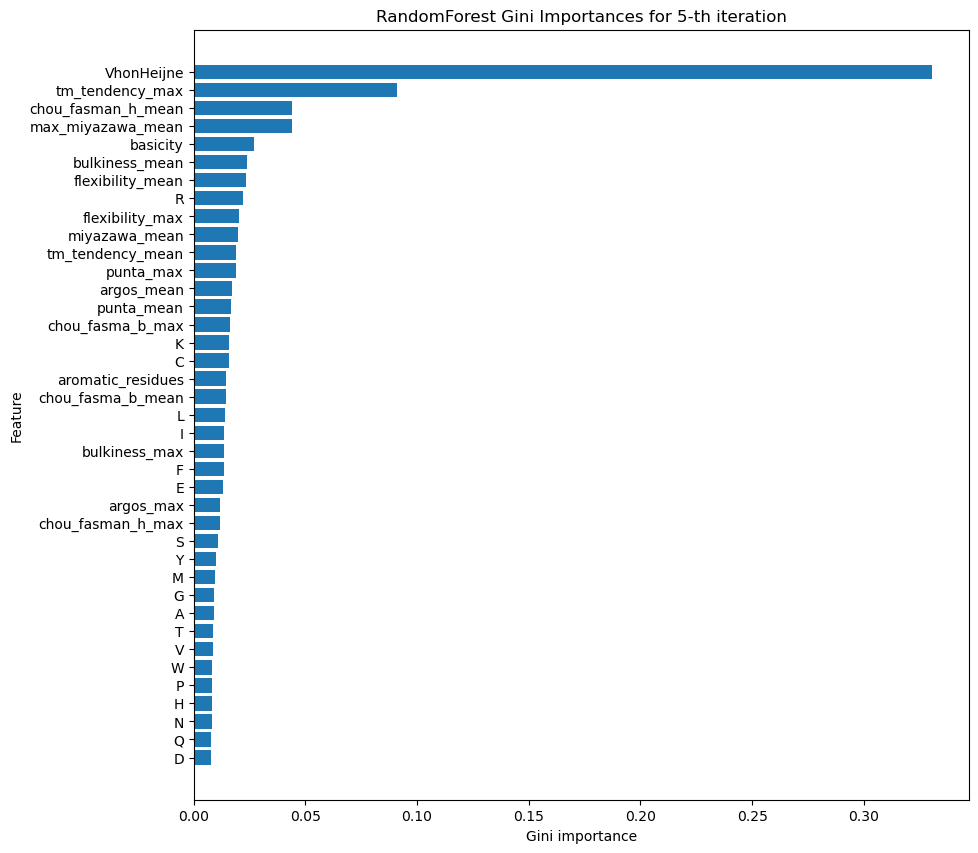

Best k on validation (using baseline best params): k=12, val_acc=0.854


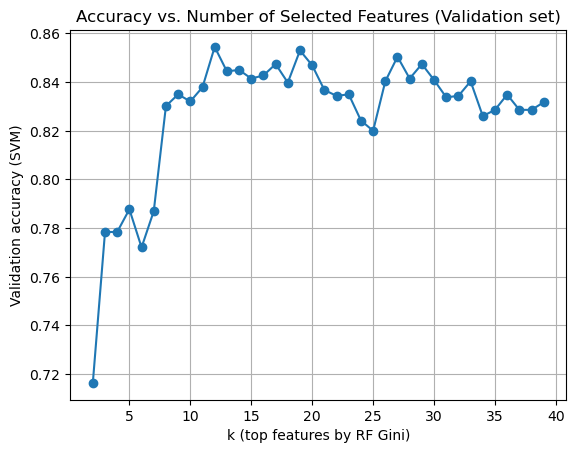

In [38]:
# create a simple grid for SVM parameters
C_grid = [0.1, 1.0, 10.0, 100.0]
gamma_grid = ["scale", 0.01, 0.1, 1.0]

#create a Pipeline with StandardScaler to normalize data and SVC as predictor model
pipeline = Pipeline([("scaler" , StandardScaler()) , ("svm" , SVC())])
rf = RandomForestClassifier(n_estimators=1000, n_jobs=-1) # construct the random forest classifier (-1 vuol dire utilizzare tutti i processori in parallelo). 

 
loaded_data_train = np.load('training_features_4.npz')
x_train = loaded_data_train['matrix']
y_train = loaded_data_train['target']

# load test
loaded_data_test = np.load('testing_features_4.npz')
x_test = loaded_data_test['matrix']
y_test = loaded_data_test['target']

# load validation
loaded_data_validation = np.load('validation_features_4.npz')
x_validation = loaded_data_validation['matrix']
y_validation = loaded_data_validation['target']

# grid search to set initial C and gamma parameters
best_mcc=-1  #initialize mcc as -1
# iterate over C and gamma we defined earlier
for C in C_grid: 
    for gamma in gamma_grid:
        #use the pipeline we created earlier with rbf kernel
        pipeline.set_params(svm__kernel="rbf",svm__C=C , svm__gamma=gamma)
        pipeline.fit(x_train, y_train)  # fit on training data
        y_pred = pipeline.predict(x_test) # predict on test data
        mcc = matthews_corrcoef(y_test, y_pred) # compute MCC     
        # store parameter values that give best MCC
        if mcc > best_mcc:
            best_mcc = mcc
            best_params_base =  (C, gamma)
pipeline.set_params(svm__kernel="rbf", svm__C=best_params_base[0], svm__gamma=best_params_base[1])
rf.fit(x_train, y_train)  # fit on train data
# create a Series with feature name and the corresponding feature importance based on Gini impurity
gini_imp = pd.Series(rf.feature_importances_, index=feature_order_testing).sort_values(ascending=False) 
gini_df = gini_imp.reset_index()
# name the columns
gini_df.columns = ["feature", "importance"]
print(f"Features by Gini importance for {i}-th iteration:")
print(gini_df)

# Plot the results
plt.figure(figsize=(10, 10))
plt.barh(gini_df["feature"][::-1], gini_df["importance"][::-1])
plt.xlabel("Gini importance")
plt.ylabel("Feature")
plt.title(f"RandomForest Gini Importances for {i}-th iteration")
plt.show()


# We'll sweep k and, for each k, re-evaluate the best baseline SVM params on the reduced feature set
ks = list(range(2, x_train.shape[1]+1))  # keep it small for speed/clarity
curve = []

for k in ks:
    subset = gini_df["feature"].head(k).tolist()
    mcc_k = performance_on_subset(subset, feature_order_training, x_train, y_train, x_validation, y_validation, pipeline)
    curve.append(mcc_k)
best_k_idx = int(np.argmax(curve))
#argmax ti returna l indice del valore piu alto in quella lista.
best_k = ks[best_k_idx]
print(f"Best k on validation (using baseline best params): k={best_k}, val_acc={curve[best_k_idx]:.3f}")

#trova k che massimizza la curva, poi solo plotting 
plt.figure()
plt.plot(ks, curve, marker="o")
plt.xlabel("k (top features by RF Gini)")
plt.ylabel("Validation accuracy (SVM)")
plt.title("Accuracy vs. Number of Selected Features (Validation set)")
plt.grid(True)
plt.show()